# **1. IMPORT KEY LIBRARIES**

 Importing the modules in order to import, clean and visual the data


In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd # a software library for python data manipulation and analysis
import requests #requests library helps us request information from an API
import json #json helps us with formatting
import csv #cvs allows us to work with csv files
from wordcloud import WordCloud #wordcloud allows us to make visualisations based on the results of our API calls
import numpy as np

# **2. DATA SOURCING**

After selecting the topic, our team engaged in data sourcing by conducting individual investigations into various educational data sources. Subsequently, we convened to collectively determine the most significant datasets and APIs suitable for analysis.

https://www.goperigon.com/data-solutions/news-api

https://writtenquestions-api.parliament.uk/index.html

https://women-in-tech.apievangelist.com/apis/people/

# __3. CONNECTING TO AND ANALYSING APIs__

* Our analysis of the attainment datasets has shown that their are disparities between different groups of girls throughout their school careers.
* Between ages 8 to 16 the average achievment of girls does depend on factors outside of her control, with our focus being on whether she is in reciept of free school meals, her ethnicity and her first language.
* As a final part of our analysis we were interested to see whether the social and economic factors that impact on a girls education are being reported on in the news or being openly discussed by decision makers in government. To assess this we searched two APIs to to gather some qualitative data and gain a wider context of our research.


## __3.1 PERIGON NEWS API__

### 3.1.1 API Connection and Analysis

In [40]:
API_KEY = "d2db50d6-8b80-4ff4-a8e4-8c9c9d46f3a9"
ALL_URL = f"https://api.goperigon.com/v1/all?apiKey={API_KEY}"

resp = requests.get(f"{ALL_URL}&sourceGroup=top100&from=2021-09-01&to=2022-08-31&sortBy=relevance&q=girls AND GCSE AND results&size=25")
articles = resp.json()["articles"]

# Open the CSV file for writing
with open("article_titles.csv", "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(["Description"])

    # Write the article titles to the CSV file
    for article in articles:
        writer.writerow([article["title"]])

In [41]:
titles = pd.read_csv('article_titles.csv')

In [42]:
titles.head()

,Description
0,Why 'patience' drives girls' historic lead ove...
1,Key statistics in this year’s GCSE results
2,GCSE trends: what this year’s results tell us
3,gcse results 2022 grades remain high inflation...
4,Geri Horner and Amanda Holden delighted at dau...


In [43]:
df = pd.read_csv("article_titles.csv")

In [44]:
print("There are {} articles in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 25 articles in this dataset. 



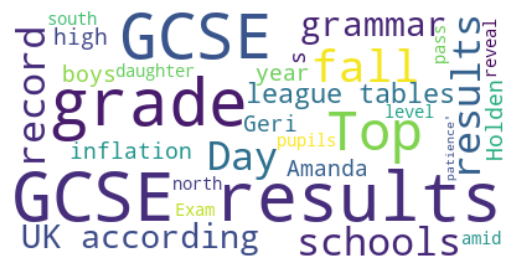

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file and concatenate all the article titles
df = pd.read_csv("article_titles.csv")
text = " ".join(df['Description'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(max_font_size=70, max_words=30, background_color="white").generate(text)

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### __3.1.2 Machine Learning - Sentiment Analysis__

* Sentiment analysis is a natural language processing (NLP) technique within Machine Learning that is used to determine the sentiment expressed in a piece of text. 
* It aims to classify the underlying sentiment(or opinion) of the text as positive, negative, or neutral.
* The most positive score is 1, the most negative score is -1 and a score of 0 is neutral.
* It is a form of supervised machine learning - so we have to split our data into testing data and training data. This allows us to access whetehr the model is working as we expect it to, although this is not something we have chosen to access in our project because of teh time constraints on us.
* Sentiment has its limitation as computers can struggle with sarcasm, figurative language, subtle nuances, or ambiguous contexts. The accuracy of sentiment analysis models heavily relies on the quality of the training data and the complexity of the model. In our case we have a relatively small sample size and our sample is news articles - which can contain lots of misleading language and subtle nuances - so we accept that our analysis will only show a very wide summary of the sentiment in the data.
* We are aiming to analyse whether news articles about girls education are generally positive, negative or neutral in tone. We can then use our findings to access whetehr the results of our report will be well received by the general public and policy makers.



In [46]:
# import textblob library to allow us to do some sentiment analysis
from textblob import TextBlob
from sklearn.model_selection import train_test_split

# Perform sentiment analysis on each article in the dataframe we made after we had extracted news articles from the API
sentiments = []
for article in df['Description']:
    blob = TextBlob(article)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

# Splitting the sentiment analysis data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Description'], sentiments, test_size=0.2, random_state=42)

# Print the article and the sentiment score for each article
for i, article in enumerate(df['Description']):
    print(f"Article #{i+1}:")
    print(article)
    print("Sentiment:", sentiments[i])
    print()


Article #1:
Why 'patience' drives girls' historic lead over boys in GCSE results
Sentiment: 0.0

Article #2:
Key statistics in this year’s GCSE results
Sentiment: 0.0

Article #3:
GCSE trends: what this year’s results tell us
Sentiment: 0.0

Article #4:
gcse results 2022 grades remain high inflation pandemic news
Sentiment: 0.16

Article #5:
Geri Horner and Amanda Holden delighted at daughters' GCSE results
Sentiment: 0.7

Article #6:
Geri Halliwell congratulates rarely seen daughter Bluebell on amazing GCSE results...
Sentiment: 0.45000000000000007

Article #7:
GCSE Results Day 2022: Nervous wait for results with fewer set to get top grades
Sentiment: 0.5

Article #8:
GCSE results show fall in top grades and pass rate in England
Sentiment: 0.5

Article #9:
Labour accuses Tories of ‘failing our children’ ahead of GCSE results day
Sentiment: 0.0

Article #10:
Exam boards aim to record GCSE and A-level results of transgender pupils
Sentiment: 0.0

Article #11:
Proud mum Amanda Holden rev

In [47]:
# Create a new column 'Sentiment' in the df and assign the sentiment scores to it (so we can analyse the scores)
df['Sentiment'] = sentiments

# Get the statistics of the sentiment scores
sentiment_stats = df['Sentiment'].describe()

print(sentiment_stats)

count    25.000000
mean      0.277689
std       0.303063
min      -0.277778
25%       0.000000
50%       0.300000
75%       0.500000
max       1.000000
Name: Sentiment, dtype: float64


* The mean sentiment score is 0.28, which is a slightly positive sentiment.
The sentiment scores range from -0.28 to 1.00, which again shows the skew of sentiments in the articles is positive.
* We can show these statistics visually using a box plot:


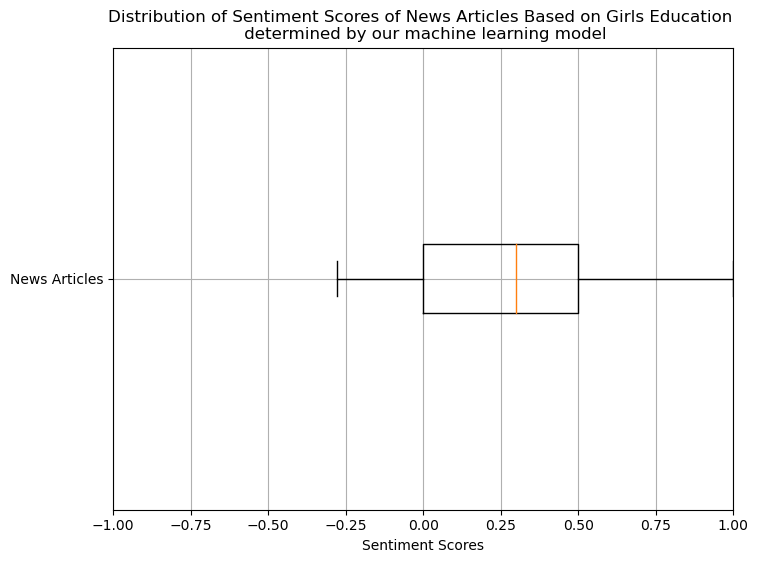

In [48]:
# Create a box plot showing the spread of the sentiment scores
plt.figure(figsize=(8, 6))
# Making vertical, and therefore easier to read
plt.boxplot(sentiments, vert=False)
plt.xlabel('Sentiment Scores')
plt.title('Distribution of Sentiment Scores of News Articles Based on Girls Education \n determined by our machine learning model')
plt.yticks([1], ['News Articles'])
# Change the x-axis to show between -1 and 1 so we can better see where the sentiment fits in the range -1 to 1
plt.xlim(-1, 1)  
plt.grid()
plt.show()

* This box plot shows the distribution of sentiment scores is in the slightly positive area.
* There are few negative scores and no scores that are extremely negative.
* There are no significant outliers.
* The conclusion we can draw from this analysis is that improving girls eduaction is seen as neutral to slightly positive in the media.
* Linking this analysis back to our research question, we can conclude that any changes that are made in relation to improving attainment gaps between girls of school age (8 to 16) would likely be positively recieved by the wider population.
* Although we do admit that our sample size of 25 articles is small, so further work needs to be done in this area. Our initial analysis provides just a initial summary view.

## __3.2 UK PARLIMENT API__
* We connected to the UK parliment API and queried the written questions historical record.
* This API shows a record off all written questions submitted in the House of Commons and House of Lords.
* We feel this gives us an understanding of whether the trends we have identified in our analysis are seen as important by the UK government.

### 3.2.1 API Connection and Analysis

Link to the UK Parliment API
https://writtenquestions-api.parliament.uk/index.html


> Searching the API for the words 'girls' and 'education'



In [49]:
# Making a function to search the API for questions that contain key words we are interested in
def search_questions(search_term):
    url = 'https://writtenquestions-api.parliament.uk/api/writtenquestions/questions'
    params = {
        'answered': 'Any',
        'questionStatus': 'AllQuestions',
        'includeWithdrawn': 'false',
        'expandMember': 'true',
        'house': 'Bicameral',
        'searchTerm': search_term
    }

    # Using the requests library
    response = requests.get(url, params=params)

    # Making a try except code to make sure we can connect to the API - if not display an error message
    try:
        response.raise_for_status()
        data = response.json()
        total_results = data['totalResults']
        print('Total questions found: {}'.format(total_results))

        # Starting a count at 0 so we can add 1 for every question found
        count = 0
        # making an empty list to store the results
        matching_results = []  
        for result in data['results']:
            # These are the names of the columns in the API we want to access
            date = result['value']['dateTabled']
            question_text = result['value']['questionText']
            MP_name = result['value']['askingMember']['name']
            party = result['value']['askingMember']['party']
            if all(word.lower() in question_text.lower() for word in search_term.split()):
                count += 1
                print('{}: {} from {} asked: {}'.format(date, MP_name, party, question_text))
                matching_results.append(result)  # Add matching result to the list
        print('Matching questions found: {}'.format(count))
        return matching_results  # Return the matching results
    except requests.exceptions.RequestException as e:
        print('Error occurred:', e)


In [50]:
# Call the function with the term 'girls education' - which is the overarching topic of our project
result1 = search_questions('girls education')
question = result1[0]['value']['questionText']
answer = result1[0]['value']['answerText']
date_asked = result1[0]['value']['dateTabled']


Total questions found: 1072
2023-03-29T00:00:00: Baroness Thornton from Labour asked: To ask His Majesty's Government what steps they are taking to support and protect at-risk girls and young women in education settings, including against poor mental health and sexual harassment.
Matching questions found: 1


* We can see one question met our search term.
* The search does bring up some intersting topics including mental health, which we had not previously considered as part of our analysis.

> Searching the API for the words 'free school meal'



In [51]:
# Call the function with the term 'free school meal' - which is one of the characteristics we are looking at
result2 = search_questions('free school meal')
question = result1[0]['value']['questionText']
answer = result1[0]['value']['answerText']
date_asked = result1[0]['value']['dateTabled']


Total questions found: 1889
2023-05-11T00:00:00: Andrew Rosindell from Conservative asked: To ask the Secretary of State for Education, what steps her Department is taking to improve literacy rates among children qualifying for pupil premium and free school meals in primary schools.
2023-05-11T00:00:00: Andrew Rosindell from Conservative asked: To ask the Secretary of State for Education, what steps she is taking to help ensure that pupil premium students in receipt of free school meals have equal access to grammar schools; and whether the government is taking steps to increase the number of suc
2023-05-02T00:00:00: Catherine West from Labour asked: To ask the Secretary of State for Education, if her Department will issue guidance to (a) schools and (b) local authorities on making reasonable adjustments when providing Free School Meals for eligible disabled children who (i) have medical or sensory ne
2023-05-02T00:00:00: Catherine West from Labour asked: To ask the Secretary of State f

* We chose to search for 'free school meal' as this ties back to our original research question.
* We can to see if decision makers are discussing the attainment gap between children who receive free school meals and their peers that we have identified in our project.
* We can see six questions were submitted which ask about free school meals.
* The questions are on a varied range of topics including literacy and disabilities.


> Searching the API for the words 'ethnicity' and 'education'



In [52]:
# Call the function with the term 'education ethnicity' - which is one of the characteristics we are looking at
result3 = search_questions('education ethnicity')
question = result1[0]['value']['questionText']
answer = result1[0]['value']['answerText']
date_asked = result1[0]['value']['dateTabled']


Total questions found: 278
2023-05-17T00:00:00: Imran Hussain from Labour asked: To ask the Secretary of State for Education, if their Department will publish an Ethnicity Pay Gap Report for financial year 2023-24 in line with the Ethnicity Pay Gap reporting guidance for employers published on 17 April 2023.
2023-03-24T00:00:00: Janet Daby from Labour asked: To ask the Secretary of State for Education, whether she is taking steps to implement the 18+1 ethnicity monitoring system for data collection in education for Gypsy, Roma and Traveller communities.
2022-12-08T00:00:00: Bridget Phillipson from Labour asked: To ask the Secretary of State for Education, To ask the Secretary of State for Education, if she will publish a breakdown of the starts on skills bootcamps by (a) age, (b) ethnicity, and (c) sex in 2021 – 22.
2022-11-21T00:00:00: Helen Hayes from Labour asked: To ask the Secretary of State for Education, how many looked after children were cared for in a family and friends foste

* We chose to search for this term to tie back to our original research question - whether ethnicity has an impact on a girls education.
* The call returned four questions, although not all questions were regarding the age range we are studying (8-16).



> Searching the API for the words 'language' and 'education'



In [53]:
# Call the function with the term 'language education' - which is one of the characteristics we are looking at
result4 = search_questions('language education')
question = result1[0]['value']['questionText']
answer = result1[0]['value']['answerText']
date_asked = result1[0]['value']['dateTabled']



Total questions found: 1432
2023-05-17T00:00:00: Anthony Mangnall from Conservative asked: To ask the Secretary of State for Education, whether her Department has made an assessment of the adequacy of enabling an Ukrainian student who is taking English language exams for the first time an additional 10 per cent of time to complete their papers;
2023-05-18T00:00:00: Derek Thomas from Conservative asked: To ask the Secretary of State for Education, what assessment she has made of the accessibility of British Sign Language classes for parents of (a) deaf children and (b) children with hearing loss who are (i) over the age of 23, (ii) not on a low income, (
2023-05-10T00:00:00: Ian Levy from Conservative asked: To ask the Secretary of State for Education, what comparative data her Department collects on the standard of boys' (a) language and (b) literacy skills prior to commencing primary education.
2023-05-10T00:00:00: Dr Rupa Huq from Labour asked: To ask the Secretary of State for Educa

* We can see 14 questions we returned for this search, which on first glance could lead us to believe this is a popular topic.
* However on closer inspection, a lot of the questions ask relate to the acadmeic subject modern languages - rather than a child's first language.

### 3.2.2 Visualisations


> **Making a word cloud to explore the types of questions asked**


* Following on from our API calls we decided to create a word cloud to allow us to visually see what topics are asked about the most.
* We chose to remove the words 'secretary', 'state', 'ask' and 'department' as these were showing up as the most dominent words but they are not relevant to our analysis. Instead these words are part of the standard format of question e.g., Can I ASK the SECRETARY of STATE for education...
* Removing the distorting effect of these words allows us to see the other topics more clearly


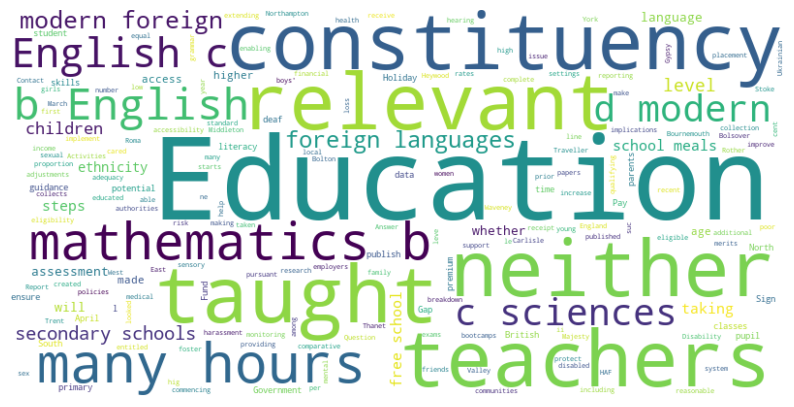

In [54]:
# Join the question texts from all sets of results into a single string
all_question_texts = " ".join([results['value']['questionText'] for results in result1] +
                              [results['value']['questionText'] for results in result2] +
                              [results['value']['questionText'] for results in result3] +
                              [results['value']['questionText'] for results in result4])


# Remove specific words from the combined question texts variable that are distorting the results
remove_words = ['secretary', 'state', 'ask', 'department']
all_question_texts = " ".join([word for word in all_question_texts.split() if word.lower() not in remove_words])

# Generate the word cloud based on the combined question texts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_question_texts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


* From this word cloud we can get a sense of the questions asked. 
* Education is of course the main word because that is one of our search terms.
* Both English and Mathematics are common words, which is useful to note for our project as ther are subjects we are looking at in detail.
* Teachers and Taught are also common words. This is interesting as we have not really considered teh role of teachers in our analysis. This could be a way for us to extend our project in the future.


> **Analysing which political parties are most interested in the topic of education**


* We then chose to analyse which political parties asked the most questions which contain the key words 'free school meals', ;language' and 'ethnicity' - which are the three topics our analysis focuses on.
* We first show this in a bar chart form, followed by a heat map.


> **Heatmap of the policital parties of the members asking questions**


* An alternative visual way of showing the same information as the bar chart above.

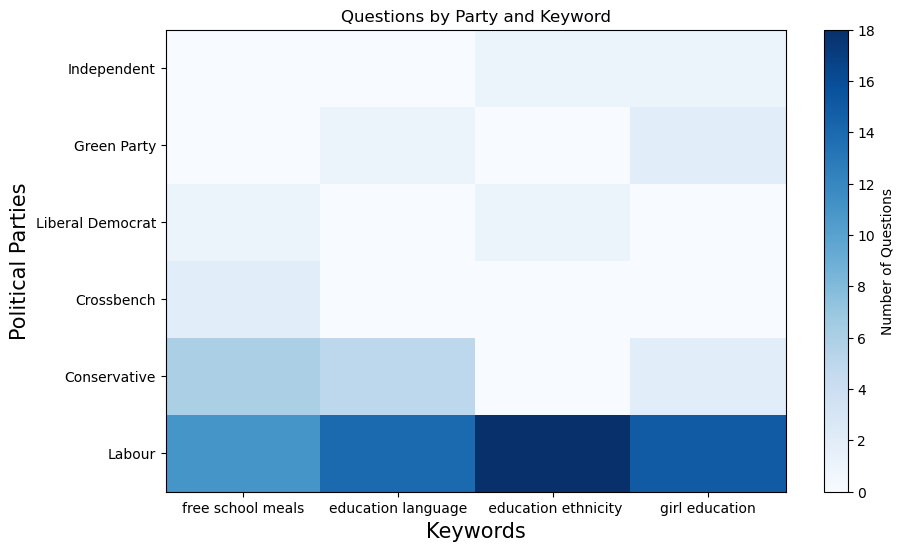

In [55]:
# Define the keywords for filtering the questions (including 'education' to increase relavancy of questions)
keywords = ['free school meals', 'education language', ' education ethnicity', 'girl education']

# URL of the API and the parameters needed to query the questions section of the UK Parliament API
url = 'https://writtenquestions-api.parliament.uk/api/writtenquestions/questions'
params = {
    'answered': 'Any',
    'questionStatus': 'AllQuestions',
    'includeWithdrawn': 'false',
    'expandMember': 'true',
    'house': 'Bicameral'
}

# Getting the response from the API for each keyword
party_counts = {}
for keyword in keywords:
    params['searchTerm'] = keyword
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        for result in data['results']:
            party = result['value']['askingMember']['party']
            party_counts.setdefault(party, {}).setdefault(keyword, 0)
            party_counts[party][keyword] += 1

# Create a matrix of question counts for each party and keyword
parties = list(party_counts.keys())
question_matrix = np.zeros((len(parties), len(keywords)))
for i, party in enumerate(parties):
    for j, keyword in enumerate(keywords):
        question_matrix[i, j] = party_counts[party].get(keyword, 0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.pcolor(question_matrix, cmap='Blues')

# Set the axis labels and ticks
plt.xticks(np.arange(len(keywords)) + 0.5, keywords)
plt.yticks(np.arange(len(parties)) + 0.5, parties)

# Add color bar
cbar = plt.colorbar(heatmap)
cbar.set_label('Number of Questions')

# Set the plot title and labels
plt.title('Questions by Party and Keyword')
plt.xlabel('Keywords', size=15)
plt.ylabel('Political Parties', size=15)

# Display the plot
plt.show()


* The current make up of the House of Commons is Conservative - 354, Labour - 196, SNP - 45, Independent - 15, Liberal Democrat - 14, DUP - 8, Sinn Fein - 7, Plaid Cymru - 3, Alba Party - 2, SDLP - 2, Alliance/Green/Reclaim - 1 and the Speaker (1).
* The current make up of teh House of Lords is Conservative - 261, Labour - 175, Crossbench - 183, Lib Dem - 83, Non-Affiliated - 37, Bishops - 25, DUP - 6, Green/Ulster Unionist - 2, Conservative Independent/Independent Social Democrat/Plaid Cymru - 1 and the Lord Speaker (1).
* Based in this make up if the interest in education and the topic we searched for (free school meals, language and ethnicity) was proportional we would expect most questions to come from Conservative members. However the vast majority of questions come from Labour part members.
* As the Conservatives are currently in power and have a majority in the House of Commons we would expect decisions to be made/funding to be allocated based on their party's prioirties.
* The initial analysis we have done using the UK Parliment API indicates these topics are not popular to be asked about by Conservative members, which may have an impact on funding. This is something we would carry our more research on if we had more time.

## **3.3 FAMOUS WOMEN IN TECH API**

We have connected to a Women in Tech API that enables us to pull back the names of famous female computer scientists.  The API includes details such as name, details, image paths, websites and tags.

https://women-in-tech.apievangelist.com/apis/people/

### 3.3.1 API Connection and Analysis

In [56]:
# call the API

API_URL = "https://women-in-tech.apievangelist.com/apis/people/"

response = requests.get(API_URL)
scientists = response.json()

with open("famous_females.csv", "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)

# determine which fields we are interested in
# write the header rows
    writer.writerow(["name", "image_path"])

# write to the csv file
# we can amend the number below depending on how many results we want to return, e.g. 5 will return index 0 - 4

    results = []
    for item in scientists[:15]:
        name = item["name"]
        image_path = item["image_path"]
        results.append({"name": name, "image_path": image_path})
        writer.writerow([name, image_path])

In [57]:
# this returns the names and the url paths to images of famous women in tech

famous_names = pd.read_csv('famous_females.csv')
famous_names

,name,image_path
0,Ada Lovelace,http://upload.wikimedia.org/wikipedia/commons/...
1,Adele Goldberg,http://www.computerhope.com/people/pictures/ad...
2,Anita Borg,http://upload.wikimedia.org/wikipedia/en/thumb...
3,Audrey Tang,http://upload.wikimedia.org/wikipedia/commons/...
4,Éva Tardos,images/220px-Elisabeth_Bauer_and_Eva_Tardos_at...
5,Barbara Liskov,http://women.cs.cmu.edu/ada/Resources/Women/pi...
6,Beatrice Helen Worsley,http://www.eng.uwaterloo.ca/~sm2campb/ferut_th...
7,Betty Holberton,http://t1.gstatic.com/images?q=tbn:ANd9GcQM-N9...
8,Carla Meninsky,http://atariage.com/forums/uploads/post-4709-1...
9,Carol Shaw,http://t0.gstatic.com/images?q=tbn:ANd9GcQeVZz...


### 3.3.2 Visualisation

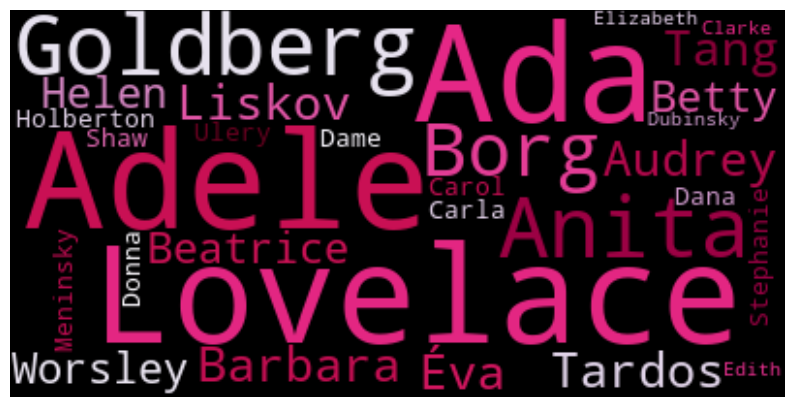

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file and concatenate all the names
famous_names = pd.read_csv("famous_females.csv")
text = " ".join(famous_names['name'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(max_font_size=70, max_words=30, colormap='PuRd',background_color="black").generate(text)

# Display the word cloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **4. CONCLUSION**

* The APIs offer us some wider context to our research on girls education. The three APIs offer us an additional insight into the wider interest in girls education and the wider setting that girls may feel they are a part of.
* The news API and our work on sentiment analysis indicates that, on a whole girls education is seen as a positive thing. We have chosen to assume that the tone of articles in the press is reflective of views in wider society.
* The UK Parliment API helped to show that whilst there is some interest in the education of girls amongst decision makers in the UK, there is perharps more of a focus on girls education on an international level, than in the UK. * The results of teh news and UK Parliment API lead us to believe that our analysis could be of graet interest to the wider UK population. News organisations seem to interested in education and the UK Parliment seem underinformed about the challenges faced by girls - both of which give us a great opportunity to share our findings.
* Finally, the information we have obtained from the female scientists API gives us hope that girls do have some sources of inspiration available to them. The results show numerous fantastic scientists, who just so happen to be female! 